In [1]:
#* for data manipulation 
import pandas as pd 
import numpy as np 


from disk_analysis_tools import tiling_disk_plots as tdp
from disk_analysis_tools import tiling_disk_utils as tdu

#* for plotting: 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
sns.set_theme(style="ticks")
sns.set_context("talk", )
#

# triplets v3 experiment analysis

In [2]:
exp_db = tdu.query_exp_db()

In [3]:
exp_id = 19
exp_db.loc[exp_db.exp_id == exp_id].exp_description.values[0]

'triplets v3: blue: v=10mm/s; brown: v=12.5mm/s; yellow: v=15mm/s; pink tip'

In [4]:
meta_data = tdu.fetch_meas_metadata(exp_id=exp_id)
meta_data

,measurement_id,exp_id,date,file_name,material,process_step,vac_mapping,coordinates,meas_cap_status,comments
0,92,19,07.02.2022,20220207_trip_vels_bfg_novac.txt,steel,before_glue,[blue:1000;brown:1000;yellow:1000],coordinates blue-bronw-yellow.txt,1,"1 rep before glueing with different vels= [10,..."
1,94,19,09.02.2022,20220209_trip_vels_bfg_novac.txt,steel,before_glue,[blue:1000;brown:1000;yellow:1000],coordinates blue-bronw-yellow.txt,1,None
2,95,19,09.02.2022,20220209_trip_v3_curing.txt,steel,curing,[blue:1000;brown:1000;yellow:1000],coordinates blue-bronw-yellow.txt,1,29 reps; curing data for trip v3; addendum: 15...


In [5]:
meas_id_bg = 94
meas_id_sig = 95

20220209_trip_vels_bfg_novac.txt
Reading data...
Reading done
control plots precut
control plots post
20220209_trip_v3_curing.txt
Reading data...
Reading done
Background Data:
Total points removed: 864
Total points removed: 0.12%
Signal Data:
Total points removed: 1224
Total points removed: 0.17%
Background Data:
Total points removed: 864
Total points removed: 0.12%
Signal Data:
Total points removed: 868
Total points removed: 0.12%
Background Data:
Total points removed: 864
Total points removed: 0.12%
Signal Data:
Total points removed: 804
Total points removed: 0.11%
Background Data:
Total points removed: 864
Total points removed: 0.12%
Signal Data:
Total points removed: 859
Total points removed: 0.12%
Background Data:
Total points removed: 864
Total points removed: 0.12%
Signal Data:
Total points removed: 806
Total points removed: 0.11%
Background Data:
Total points removed: 864
Total points removed: 0.12%
Signal Data:
Total points removed: 798
Total points removed: 0.11%
Background D

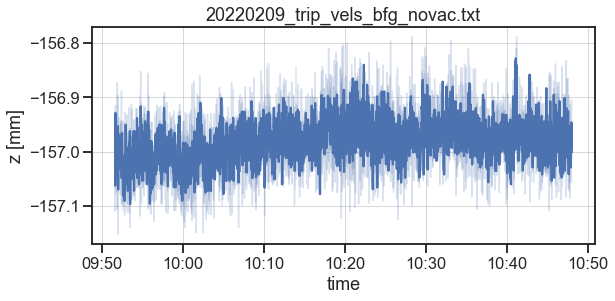

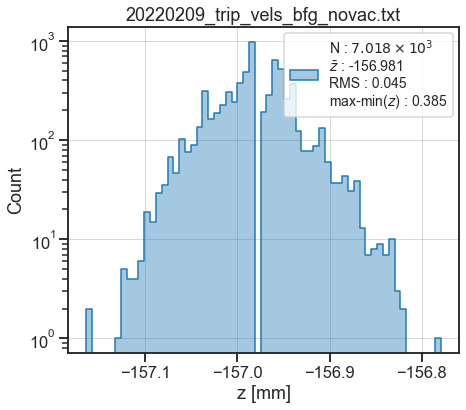

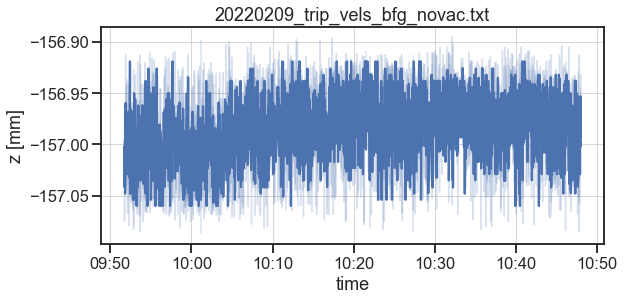

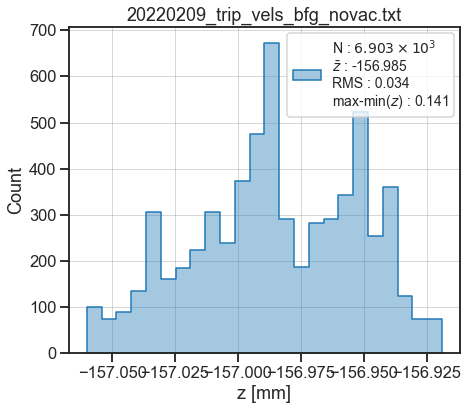

In [6]:
v1_data_pt = tdu.laser_data_analysis(meas_id_sig, #* meas signal
                                           meas_id_bg, #* meas bg
                                           meta_data, 
                                           folder='triplets',
                                            bg_data_check=True, 
                                            sig_data_check=False,
                                            print_removed_points=True,
                                            )

In [7]:
result_df= tdu.calc_flats_statistic_df(v1_data_pt)
result_df.tail()

,R,deltaR,RMS,unix_time,run_nr,datetime,time_h,odd_runs
23,32.027972,3.933818,5.151558,1644490152,24,2022-02-10 11:49:12.048529152+01:00,21.356389,0
24,34.175874,4.405223,5.113290,1644493538,25,2022-02-10 12:45:38.415326464+01:00,22.296944,1
25,34.300000,4.120603,5.196774,1644496916,26,2022-02-10 13:41:56.925684480+01:00,23.235278,0
26,38.643823,4.381051,5.313643,1644500301,27,2022-02-10 14:38:21.645663232+01:00,24.175556,1
27,38.714336,4.376917,5.504529,1644503681,28,2022-02-10 15:34:41.437057536+01:00,25.114444,0


(curing, vac off)


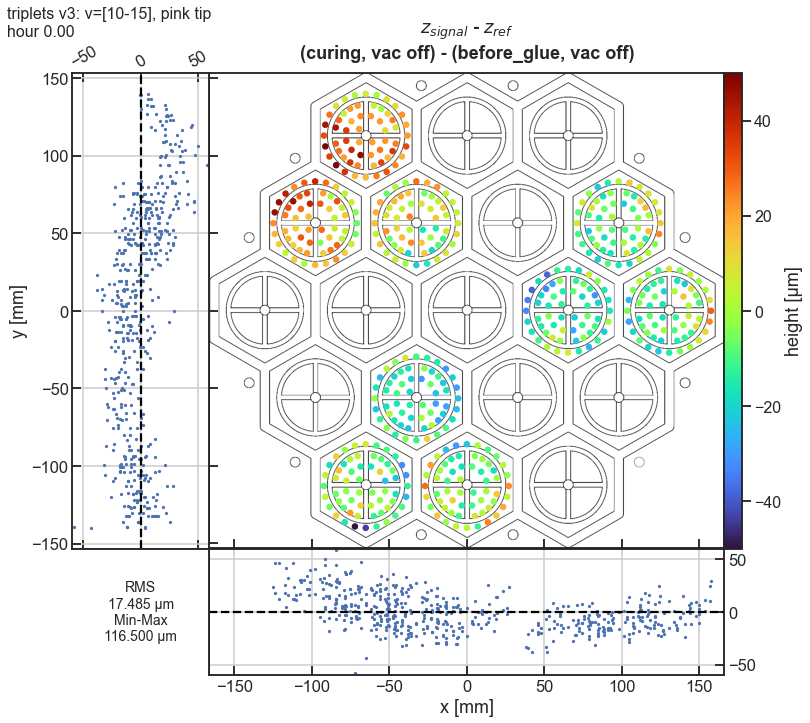

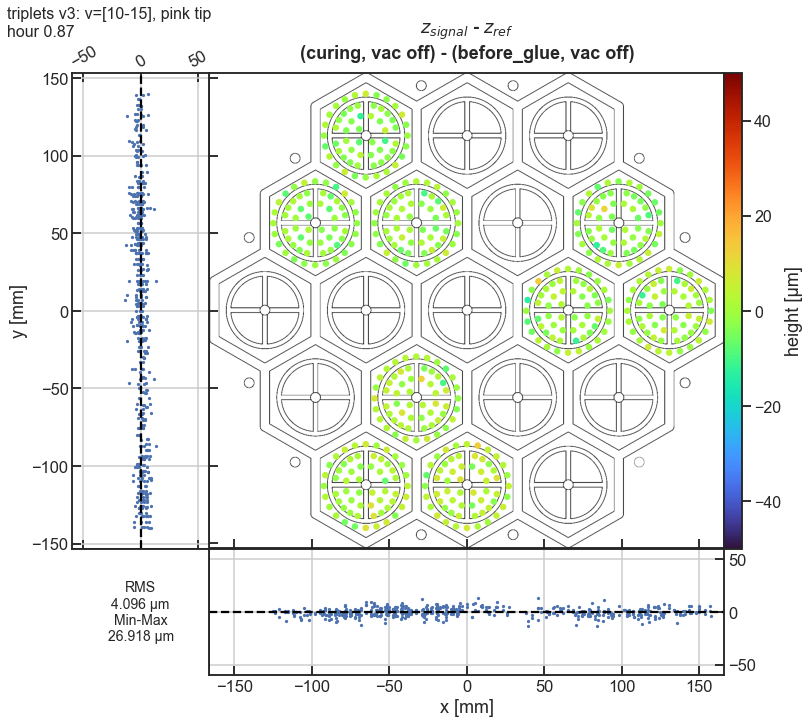

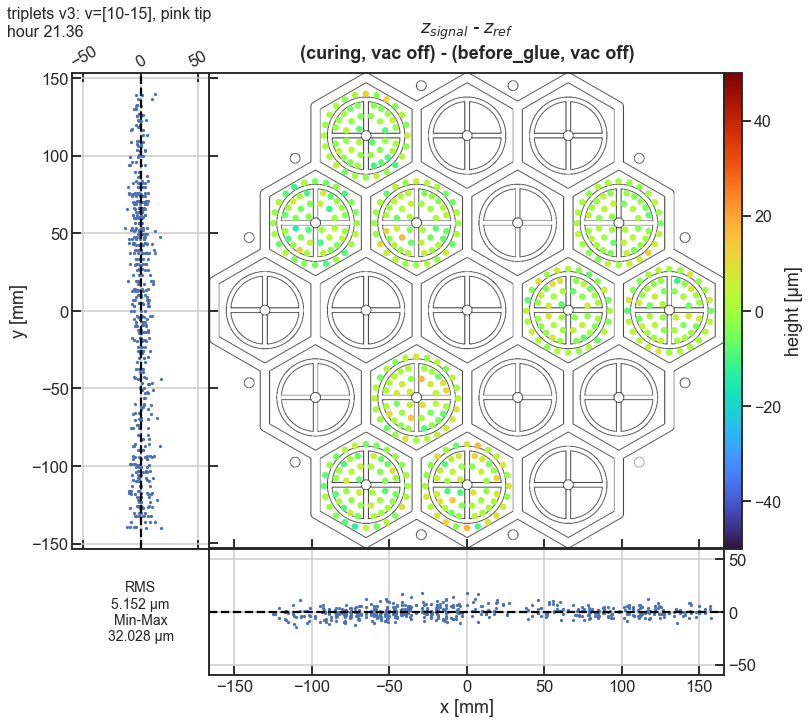

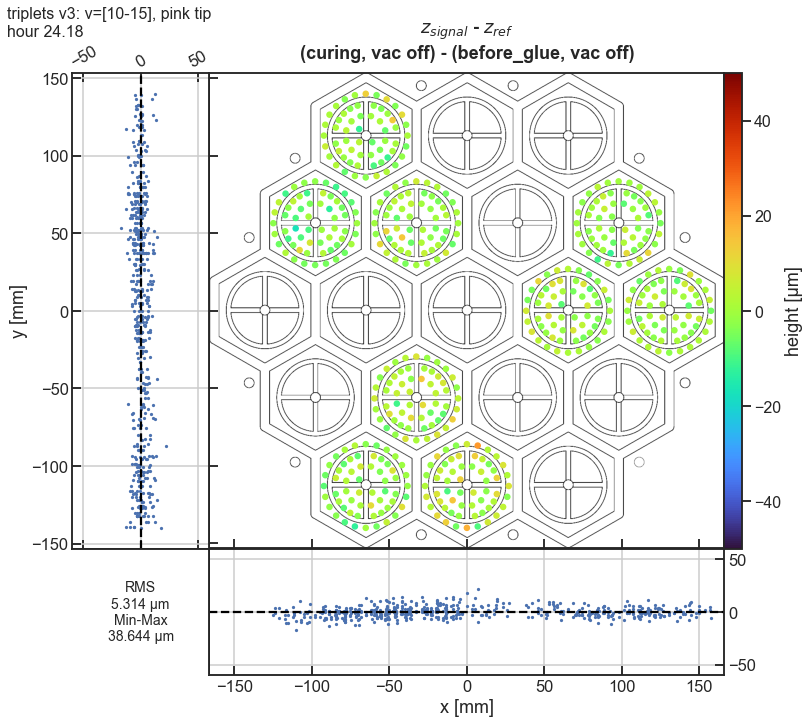

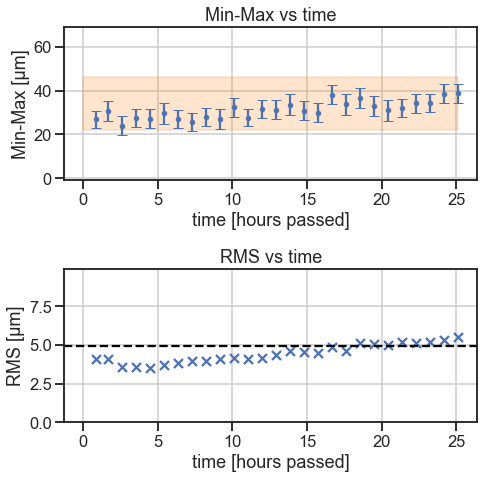

In [8]:
tdp.plot_analysis_results(exp_id, #*exp id
                          v1_data_pt, #* measurements dict
                          exp_db, #* experiments database
                          meta_data, #* meta data df
                          meas_id_sig= meas_id_sig,
                          meas_id_bg = meas_id_bg,
                          plot_runs=[1,2,24,27,29],
                          joyplot=False,hexagon_flatness=True, R_vs_t=True, triplet=False)

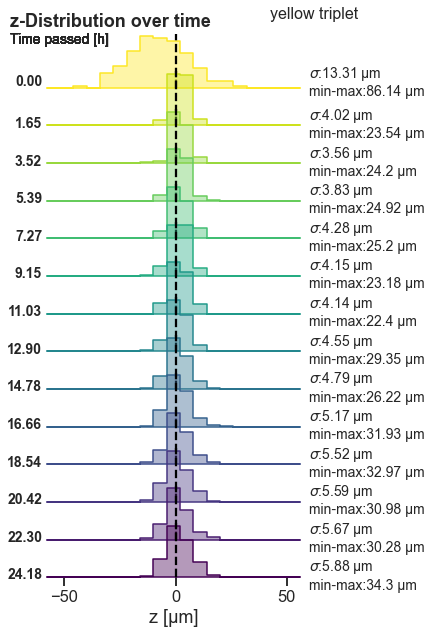

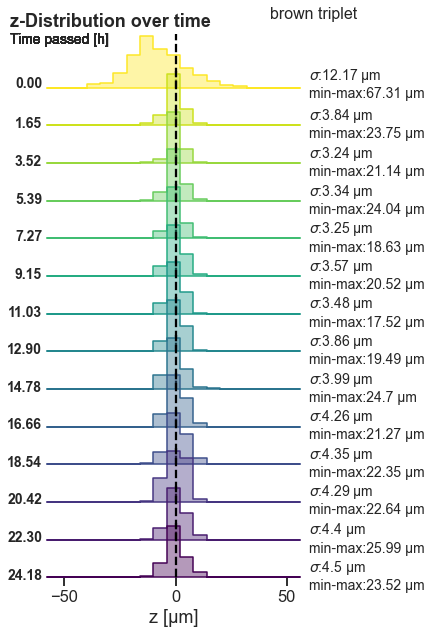

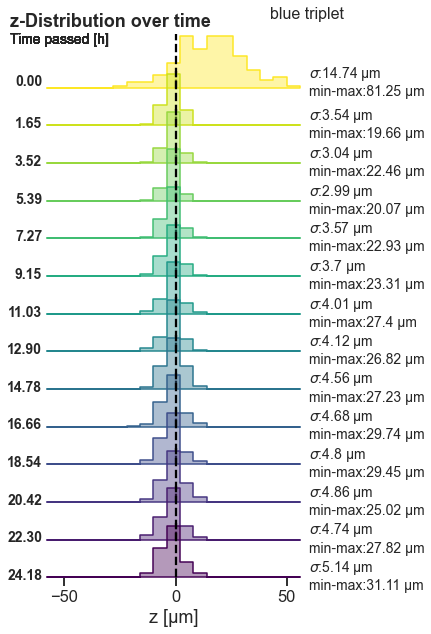

In [9]:
tdp.plot_analysis_results(exp_id, #*exp id
                          v1_data_pt, #* measurements dict
                          exp_db, #* experiments database
                          meta_data, #* meta data df
                          meas_id_sig= meas_id_sig,
                          meas_id_bg = meas_id_bg,
                          plot_runs=[1,24,25,26,27,49],
                          joyplot=True,hexagon_flatness=False, R_vs_t=False, triplet=True, joyplot_summary_stats=True)